# Modeling and Simulation in Python

Case study: tree growth

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

In [1]:
# If you want the figures to appear in the notebook, use
# %matplotlib notebook

# If you want the figures to appear in separate windows, use
# %matplotlib qt

# To switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

In [2]:
years = [2, 3, 4, 5, 6, 8, 10, 15, 20, 25, 30,
         35, 40, 45, 50, 55, 60, 65, 70]

In [3]:
site65 = Series([1.4, 1.56, 2.01, 2.76, 3.79, 6.64, 10.44, 
                 23.26, 37.65, 51.66, 65.00, 77.50, 89.07, 
                 99.66, 109.28, 117.96, 125.74, 132.68, 138.84],
               index=years)

In [4]:
site45 = Series([1.4, 1.49, 1.75, 2.18, 2.78, 4.45, 6.74,
                 14.86, 25.39, 35.60, 45.00, 53.65, 61.60,
                68.92, 75.66, 81.85, 87.56, 92.8, 97.63],
               index=years)

In [5]:
site = site65

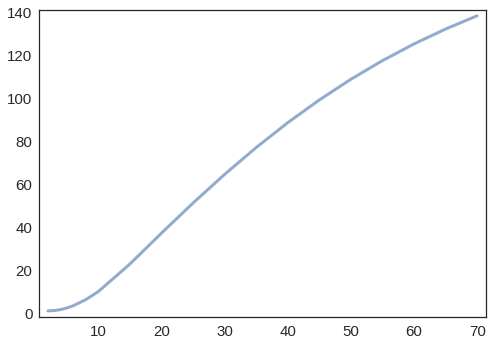

In [6]:
plot(site)

In [7]:
def update(year, mass, state):
    height = mass**(1/tree.dimension)
    area = height**2
    growth = state.alpha * area * (1 - height/tree.K)
    return mass + growth

In [8]:
t0 = years[0]
h0 = site[t0]

In [9]:
tree = State(mass=1, alpha=2.1, dimension=2.55, K=155)

In [10]:
m0 = h0**tree.dimension

In [11]:
tree.masses = Series({t0: m0})

for i in range(t0, 70):
    tree.masses[i+1] = update(i, tree.masses[i], tree)

In [12]:
# TODO: check whether there are any labeled lines before calling lengend,
# or suppress the warning

In [13]:
heights = tree.masses**(1.0/tree.dimension)

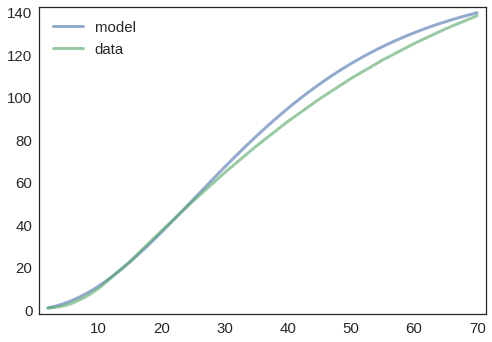

In [14]:
plot(heights, label='model')
plot(site, label='data')
decorate()

In [15]:
tree = State(t0=t0, h0=1.4, alpha=4, dimension=2.75, K=180)

In [16]:
def run_model(state):
    m0 = h0**tree.dimension
    tree.masses = Series({state.t0: m0})

    for i in range(t0, 70):
        tree.masses[i+1] = update(i, tree.masses[i], state)

In [17]:
run_model(tree)
heights = tree.masses**(1/tree.dimension)

In [18]:
def print_errors(model, data):
    abs_err = abs(model[data.index] - data)
    rel_err = abs_err / data * 100
    print(rel_err)

In [19]:
def error(model, data):
    abs_err = abs(model[data.index] - data)
    rel_err = abs_err / data * 100
    return abs_err.mean()

In [20]:
print_errors(heights, site)

2      0.000000
3     49.694226
4     75.105242
5     78.623363
6     72.577674
8     54.603746
10    39.104139
15    14.628389
20     5.888718
25     3.098765
30     2.010609
35     1.521434
40     1.258326
45     1.093650
50     0.959699
55     0.832736
60     0.710257
65     0.588058
70     0.469444
dtype: float64


In [21]:
error(heights, site)

1.6414244679037722

In [22]:
from scipy.optimize import fmin

In [23]:
alpha = 2.1
dimension = 2.55
K = 155

In [24]:
x0 = [alpha, dimension, K]

In [25]:
def func(x, tree):
    tree.alpha, tree.dimension, tree.K = x
    run_model(tree)
    heights = tree.masses**(1/tree.dimension)
    return error(heights, site)

In [26]:
func(x0, tree)

2.7080403545468705

In [27]:
args = (tree,)
params = fmin(func, x0, args=args)
params

Optimization terminated successfully.
         Current function value: 0.816658
         Iterations: 227
         Function evaluations: 402


array([   3.15699844,    2.68802177,  172.20946257])

In [28]:
tree.alpha, tree.dimension, tree.K = params
run_model(tree)
heights = tree.masses**(1/tree.dimension)

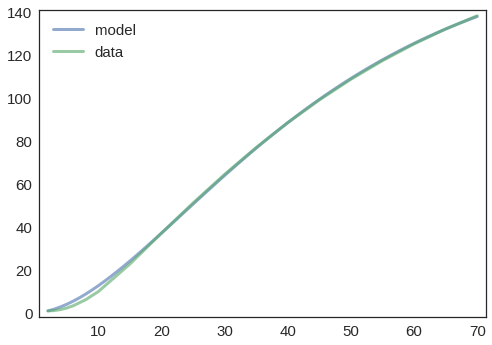

In [29]:
plot(heights, label='model')
plot(site, label='data')
decorate()

In [30]:
error(heights, site)

0.8166584949092535